Count LAT memory errors and plot errors in timespan on a map

By: Joe Eggen, April 2018

In [1]:
# specify the time range for the geographic plot of LAT memory errors
start = "2019-07-01"
end = "2019-10-01"

# specify the source of the data being plotted and the name of the output file
basedir = "/Users/jeggen/ISOC/2019_Q3/"
histfile = basedir+"memerr.history"
outfile = basedir+"memerr_map_2019_Q3"

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import time
import calendar
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [5]:
t_start = calendar.timegm(time.strptime(start, '%Y-%m-%d'))
t_end = calendar.timegm(time.strptime(end, '%Y-%m-%d'))
# read ASCII file of LAT memory errors
err_count = {}
err_count['SIU'] = 0
err_count[('SIU','3')] = 0
err_count[('SIU','4')] = 0
err_count['EPU0'] = 0
err_count[('EPU0','3')] = 0
err_count[('EPU0','4')] = 0
err_count['EPU1'] = 0
err_count[('EPU1','3')] = 0
err_count[('EPU1','4')] = 0
err_count['3'] = 0
err_count['4'] = 0
err_count['all'] = 0
err_count_in = err_count.copy()
err_count_out = err_count.copy()
n_blank = 0
lon_in = []
lat_in = []
lon_out = []
lat_out = []
period_err = 0
with open(histfile) as fi:
    for line in fi:
        if not line.strip():
            n_blank += 1
            continue
        line = re.sub('[\(\)\:]',' ',line)
        ws = line.split()
        key1 = ws[0]
        key2 = (ws[0],ws[10])
        key3 = ws[10]
        err_count[key1] = err_count.get(key1, 0) + 1
        err_count[key2] = err_count.get(key2, 0) + 1
        err_count[key3] = err_count.get(key3, 0) + 1
        err_count['all'] = err_count.get('all', 0) + 1
        if float(ws[5]) > t_start and float(ws[5]) < t_end:
#            print (ws[-1])
            period_err += 1
            if int(ws[-1]) == 1:
                lon_in.append(float(ws[-3]))
                lat_in.append(float(ws[-2]))
                err_count_in[key1] = err_count_in.get(key1, 0) + 1
                err_count_in[key2] = err_count_in.get(key2, 0) + 1
                err_count_in[key3] = err_count_in.get(key3, 0) + 1
                err_count_in['all'] = err_count_in.get('all', 0) + 1
            else:
                lon_out.append(float(ws[-3]))
                lat_out.append(float(ws[-2]))
                err_count_out[key1] = err_count_out.get(key1, 0) + 1
                err_count_out[key2] = err_count_out.get(key2, 0) + 1
                err_count_out[key3] = err_count_out.get(key3, 0) + 1
                err_count_out['all'] = err_count_out.get('all', 0) + 1
fi.close()

In [6]:
##LAT CPU MEMORY ERRORS

In [7]:
print (n_blank,"blank lines (1 per day)")
err = err_count
print ("LAT CPU MEMORY ERRORS\n")
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))

err = err_count_in
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal (inside the SAA, for the time period)")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))

err = err_count_out
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal (outside the SAA, for the time period)")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))

(4070, 'blank lines (1 per day)')
LAT CPU MEMORY ERRORS


Cumulative Errors	SIU	EPU0	EPU1	Total
Single Bit		39424	15245	43636	98305
Double Bit		716	259	961	1936
Total			40140	15504	44597	100241

Cumulative Errors	SIU	EPU0	EPU1	Total (inside the SAA, for the time period)
Single Bit		797	335	877	2009
Double Bit		20	10	10	40
Total			817	345	887	2049

Cumulative Errors	SIU	EPU0	EPU1	Total (outside the SAA, for the time period)
Single Bit		82	27	78	187
Double Bit		0	0	1	1
Total			82	27	79	188


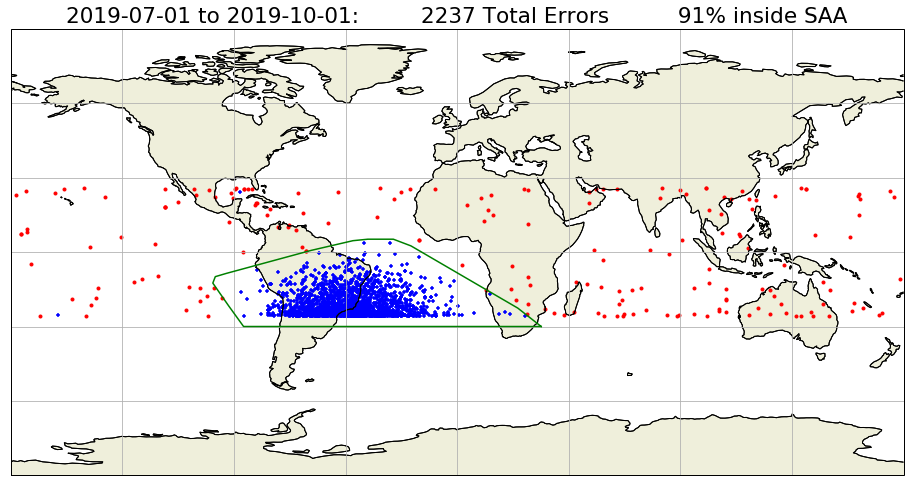

In [10]:
plt.figure(figsize = [16, 9])
plt.rc('font', size = 18)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# draw parallels and meridians
ax.gridlines(xlocs=np.arange(-180.,181.,45.),ylocs=np.arange(-90.,91.,30.))

# draw the SAA polygon
saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]
plt.plot(saalon,saalat,color='g',linewidth=1.5,transform=ccrs.PlateCarree())
plt.scatter(lon_in,lat_in,s=15,marker='+',color='b')
plt.scatter(lon_out,lat_out,s=9,marker='o',color='r')

saapercent = 100*len(lat_in)/period_err
plt.title("%s to %s:         %s Total Errors          %d%% inside SAA" % (start,end,period_err,saapercent))
plt.show()
plt.savefig(outfile)